## Import modules

In [0]:
import pandas as pd
import numpy as np

In [0]:
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler

## Dataset of mobile games from the app store

In [0]:
dataset = pd.read_csv('appstore_games.csv')
dataset.head()

,URL,ID,Name,Subtitle,Icon URL,Average User Rating,User Rating Count,Price,In-app Purchases,Description,Developer,Age Rating,Languages,Size,Primary Genre,Genres,Original Release Date,Current Version Release Date
0,https://apps.apple.com/us/app/sudoku/id284921427,284921427,Sudoku,NaN,https://is2-ssl.mzstatic.com/image/thumb/Purpl...,4.0,3553.0,2.99,NaN,"Join over 21,000,000 of our fans and download ...",Mighty Mighty Good Games,4+,"DA, NL, EN, FI, FR, DE, IT, JA, KO, NB, PL, PT...",15853568.0,Games,"Games, Strategy, Puzzle",11/07/2008,30/05/2017
1,https://apps.apple.com/us/app/reversi/id284926400,284926400,Reversi,NaN,https://is4-ssl.mzstatic.com/image/thumb/Purpl...,3.5,284.0,1.99,NaN,"The classic game of Reversi, also known as Oth...",Kiss The Machine,4+,EN,12328960.0,Games,"Games, Strategy, Board",11/07/2008,17/05/2018
2,https://apps.apple.com/us/app/morocco/id284946595,284946595,Morocco,NaN,https://is5-ssl.mzstatic.com/image/thumb/Purpl...,3.0,8376.0,0.00,NaN,Play the classic strategy game Othello (also k...,Bayou Games,4+,EN,674816.0,Games,"Games, Board, Strategy",11/07/2008,5/09/2017
3,https://apps.apple.com/us/app/sudoku-free/id28...,285755462,Sudoku (Free),NaN,https://is3-ssl.mzstatic.com/image/thumb/Purpl...,3.5,190394.0,0.00,NaN,"Top 100 free app for over a year.\nRated ""Best...",Mighty Mighty Good Games,4+,"DA, NL, EN, FI, FR, DE, IT, JA, KO, NB, PL, PT...",21552128.0,Games,"Games, Strategy, Puzzle",23/07/2008,30/05/2017
4,https://apps.apple.com/us/app/senet-deluxe/id2...,285831220,Senet Deluxe,NaN,https://is1-ssl.mzstatic.com/image/thumb/Purpl...,3.5,28.0,2.99,NaN,"""Senet Deluxe - The Ancient Game of Life and A...",RoGame Software,4+,"DA, NL, EN, FR, DE, EL, IT, JA, KO, NO, PT, RU...",34689024.0,Games,"Games, Strategy, Board, Education",18/07/2008,22/07/2018


In [0]:
print(dataset.columns)

# Columns I hate:
hate = ['User Rating Count','Genres','Name', 'URL', 'ID', 'Subtitle', 'Icon URL', 'Description', 'Developer', 'Primary Genre', 'Current Version Release Date', 'In-app Purchases']

data = dataset.drop(hate, axis=1)
data.head()

Index(['URL', 'ID', 'Name', 'Subtitle', 'Icon URL', 'Average User Rating',
       'User Rating Count', 'Price', 'In-app Purchases', 'Description',
       'Developer', 'Age Rating', 'Languages', 'Size', 'Primary Genre',
       'Genres', 'Original Release Date', 'Current Version Release Date'],
      dtype='object')


,Average User Rating,Price,Age Rating,Languages,Size,Original Release Date
0,4.0,2.99,4+,"DA, NL, EN, FI, FR, DE, IT, JA, KO, NB, PL, PT...",15853568.0,11/07/2008
1,3.5,1.99,4+,EN,12328960.0,11/07/2008
2,3.0,0.00,4+,EN,674816.0,11/07/2008
3,3.5,0.00,4+,"DA, NL, EN, FI, FR, DE, IT, JA, KO, NB, PL, PT...",21552128.0,23/07/2008
4,3.5,2.99,4+,"DA, NL, EN, FR, DE, EL, IT, JA, KO, NO, PT, RU...",34689024.0,18/07/2008


In [0]:
data = data.iloc[:1000,:]
data.head()

,Average User Rating,Price,Age Rating,Languages,Size,Original Release Date
0,4.0,2.99,4+,"DA, NL, EN, FI, FR, DE, IT, JA, KO, NB, PL, PT...",15853568.0,11/07/2008
1,3.5,1.99,4+,EN,12328960.0,11/07/2008
2,3.0,0.00,4+,EN,674816.0,11/07/2008
3,3.5,0.00,4+,"DA, NL, EN, FI, FR, DE, IT, JA, KO, NB, PL, PT...",21552128.0,23/07/2008
4,3.5,2.99,4+,"DA, NL, EN, FR, DE, EL, IT, JA, KO, NO, PT, RU...",34689024.0,18/07/2008


## Lets get our x features and y organized. <br>
In this particular dataset, we are looking at average rating.

## Spring Cleaning

In [0]:
data.isnull().any() 

Average User Rating       True
Price                    False
Age Rating               False
Languages                 True
Size                     False
Original Release Date    False
dtype: bool

### Average User Rating

In [0]:
data['Average User Rating'].describe()

count    893.000000
mean       3.639418
std        0.750480
min        1.000000
25%        3.000000
50%        3.500000
75%        4.000000
max        5.000000
Name: Average User Rating, dtype: float64

In [0]:
avr = round(data['Average User Rating'].mean(),2)

data['Average User Rating'] = data['Average User Rating'].fillna(avr)

print('Filled NaN values with:',avr)
data['Average User Rating'].head()

Filled NaN values with: 3.64


0    4.0
1    3.5
2    3.0
3    3.5
4    3.5
Name: Average User Rating, dtype: float64

Checking average user rating to decide between classifier or regressor

In [0]:
# The distribution of possible ratings
data['Average User Rating'].unique()

array([4.  , 3.5 , 3.  , 2.5 , 3.64, 2.  , 4.5 , 1.5 , 5.  , 1.  ])

In [0]:
data['Average User Rating'].replace(1,2,inplace=True)
data['Average User Rating'].replace(1.5,2,inplace=True)

In [0]:
main = data['Average User Rating']

unique = main.unique()
unique.sort()

unique

array([2.  , 2.5 , 3.  , 3.5 , 3.64, 4.  , 4.5 , 5.  ])

In [0]:
freq = []

for x in unique:
   freq.append(len(main[main==x]))

freq

[37, 82, 132, 203, 107, 234, 179, 26]

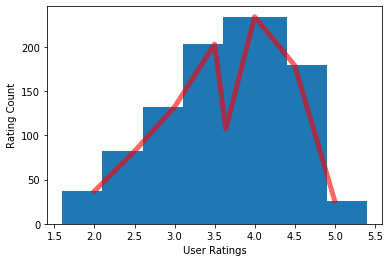

In [0]:
plt.plot(unique, freq, c='red', alpha=0.6, linewidth=5)
plt.bar(unique, freq)

plt.xlabel('User Ratings'); plt.ylabel('Rating Count')

plt.show()

There are only several ratings possible in the AppStore, so I'm going to go with classifier.

### User Rating Count

In [0]:
#data['User Rating Count'].describe()

In [0]:
# Fill NaN with mean
#data['User Rating Count'] = data['User Rating Count'].fillna(5703)

#print('Filled NaN values with:',5703)
#data['User Rating Count'].head()

In [0]:
#scaler = StandardScaler()

#scaler.fit(data['User Rating Count'].values.reshape(-1,1))
#data['User Rating Count'] = scaler.transform((data['User Rating Count'].values.reshape(-1,1)))

## Price

In [0]:
print(data['Price'].describe())
data['Price'].head()

count    1000.000000
mean        0.908320
std         1.759502
min         0.000000
25%         0.000000
50%         0.000000
75%         0.990000
max        19.990000
Name: Price, dtype: float64


0    2.99
1    1.99
2    0.00
3    0.00
4    2.99
Name: Price, dtype: float64

In [0]:
data['Price'].unique()

array([ 2.99,  1.99,  0.  ,  0.99,  5.99,  7.99,  4.99,  3.99,  9.99,
       19.99,  6.99, 11.99])

In [0]:
le = preprocessing.LabelEncoder()
le.fit(data['Price'])

print(le.classes_)
data['Price'] = le.transform(data['Price'])

data['Price'].head()


[ 0.    0.99  1.99  2.99  3.99  4.99  5.99  6.99  7.99  9.99 11.99 19.99]


0    3
1    2
2    0
3    0
4    3
Name: Price, dtype: int64

## Age

In [0]:
# Check if any null values
data['Age Rating'].isnull().any()

False

In [0]:
le = preprocessing.LabelEncoder()
le.fit(data['Age Rating'])

print(le.classes_)
data['Age Rating'] = le.transform(data['Age Rating'])

data['Age Rating'].head()

['12+' '17+' '4+' '9+']


0    2
1    2
2    2
3    2
4    2
Name: Age Rating, dtype: int64

## Languages

In [0]:
data['Languages'] = dataset.iloc[:1000, 12]

In [0]:
data['Languages'].describe()

count     994
unique    135
top        EN
freq      656
Name: Languages, dtype: object

In [0]:
data['Languages'].isnull().any()

data['Languages'].fillna('0', inplace=True)

In [0]:
for each in enumerate(data['Languages']):
  data['Languages'][each[0]] = len(each[1])

print(data['Languages'])

0      66
1       2
2       2
3      66
4      58
       ..
995     2
996     2
997     2
998    22
999    62
Name: Languages, Length: 1000, dtype: object


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [0]:
for x in data['Languages']:
  if type(x)!=int:
    print('shit')

## Size



In [0]:
data['Size'].describe()

count    1.000000e+03
mean     5.688938e+07
std      9.486754e+07
min      5.132800e+04
25%      1.161739e+07
50%      2.660870e+07
75%      5.846502e+07
max      1.025170e+09
Name: Size, dtype: float64

In [0]:
data['Size'].isnull().any()

False

In [0]:
#scaler = StandardScaler()

#scaler.fit(data['Size'].values.reshape(-1,1))
#data['Size'] = scaler.transform((data['Size'].values.reshape(-1,1)))

## Release Date

In [0]:
import datetime

In [0]:
data['Original Release Date'].isnull().any()

False

In [0]:
data['Original Release Date'] = dataset.iloc[:1000,-1]

In [0]:
# Converting age of apps to days

data['Original Release Date']

formatt = '%d/%m/%Y'
today = datetime.datetime.today()

for each in enumerate(data['Original Release Date']):
  datetime_obj = datetime.datetime.strptime(each[1], formatt)
  data['Original Release Date'][each[0]] = (today-datetime_obj).days
  
data['Original Release Date']
  
#(today-(data['Original Release Date'][0])).days

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


0       887
1       535
2       789
3       887
4       469
       ... 
995    1592
996    1385
997     751
998     257
999    1856
Name: Original Release Date, Length: 1000, dtype: object

In [0]:
#scaler2 = StandardScaler()

#scaler2.fit(data['Original Release Date'].values.reshape(-1,1))
#data['Original Release Date'] = scaler2.transform(data['Original Release Date'].values.reshape(-1,1))

#data['Original Release Date']

In [0]:
data.isnull().any()

Average User Rating      False
Price                    False
Age Rating               False
Languages                False
Size                     False
Original Release Date    False
dtype: bool

In [0]:
from sklearn.tree import DecisionTreeClassifier as dtc

In [0]:
y = data['Average User Rating']
x = data.drop('Average User Rating', axis=1)

In [0]:
y = y.astype('str')

In [0]:
y.unique()

array(['4.0', '3.5', '3.0', '2.5', '3.64', '2.0', '4.5', '5.0'],
      dtype=object)

In [0]:
import sklearn.model_selection as ms

x_train, x_test, y_train, y_test = ms.train_test_split(x, y, test_size=0.4)

In [0]:
model = dtc(criterion='entropy',random_state=1,max_depth=3)
model2 = dtc(criterion='gini',random_state=1,max_depth=3)

model.fit(x_train,y_train)
model2.fit(x_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=1, splitter='best')

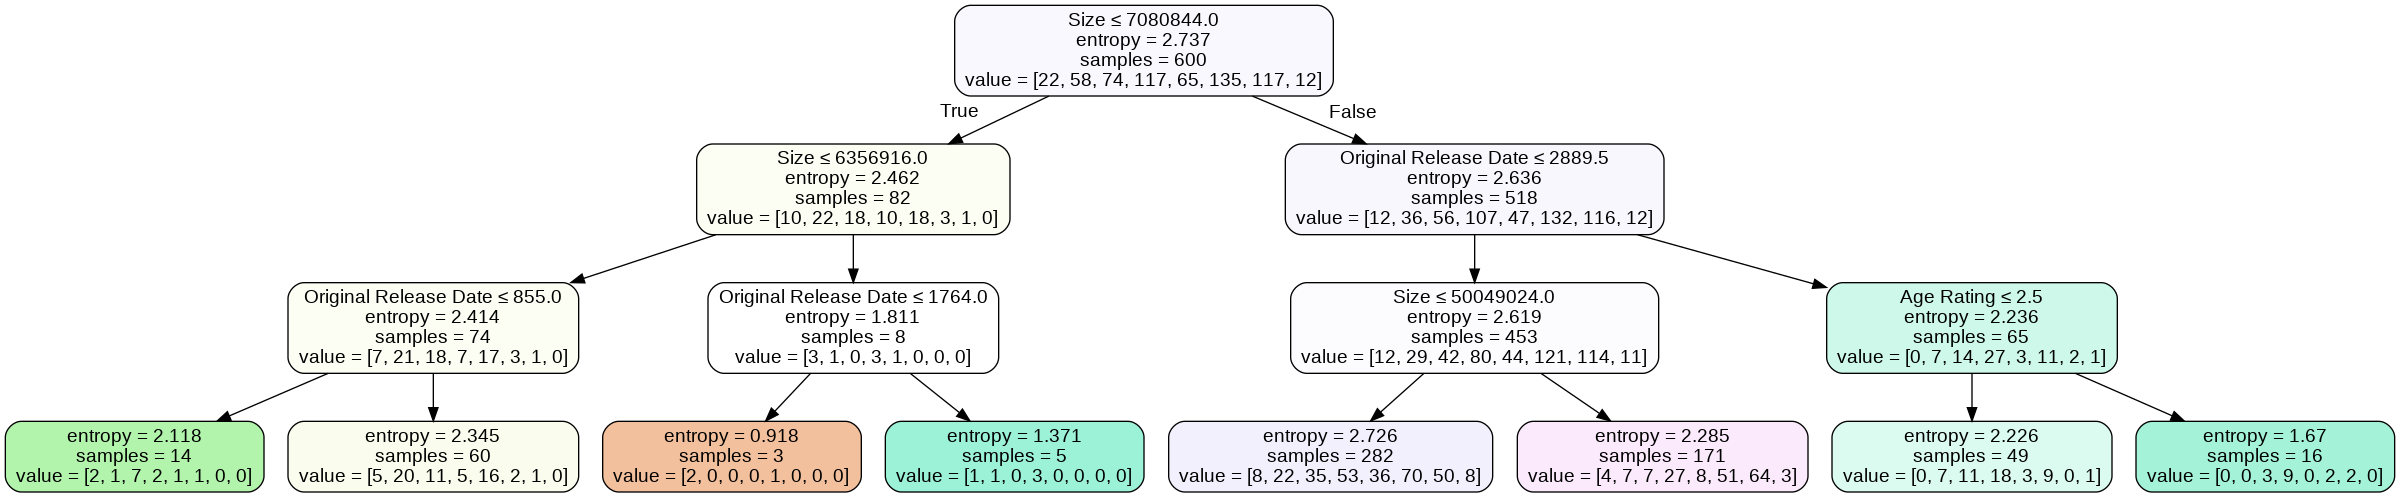

In [0]:
from sklearn.externals.six import StringIO  
from IPython.display import Image
from sklearn.tree import export_graphviz
import pydotplus
dot_data = StringIO()
export_graphviz(model, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,
               feature_names=x_train.columns)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

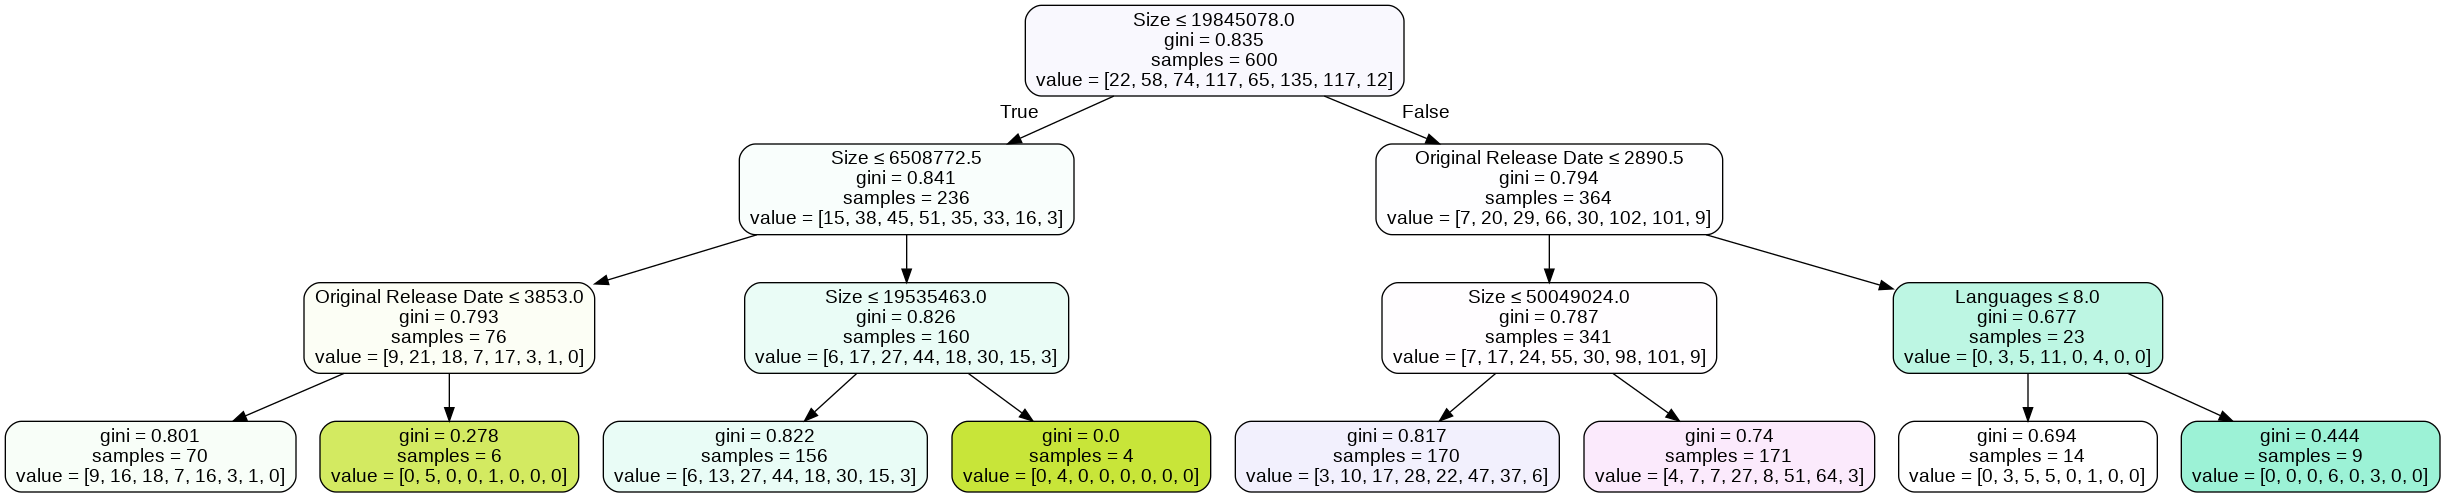

In [0]:
from sklearn.externals.six import StringIO  
from IPython.display import Image
from sklearn.tree import export_graphviz
import pydotplus
dot_data = StringIO()
export_graphviz(model2, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,
               feature_names=x_train.columns)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())